In [1]:
# -*- coding: gbk -*

In [2]:
from torch.autograd import Variable
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
import random

In [3]:
data = pd.read_csv(open('data.csv'))
data = data.fillna(0)
print(data)
print(data.head(0))
sum_all = data.sum()
print(sum_all)
print(sum_all['主要客流时间'])

      商户ID 一级行业  二级行业 商户类型          商户简称                        商户全称    省  \
0   902057   美食  小吃快餐   连锁       太门平直街分店         杭州新丰小吃有限公司(太平门直街分店)  浙江省   
1   914635   美食  小吃快餐   连锁      新丰小吃凤起路店            杭州新丰小吃有限公司(凤起路店)  浙江省   
2   900880   美食  小吃快餐   连锁     新丰小吃解放路分店             杭州新丰小吃有限公司解放路分店  浙江省   
3   917555   美食  小吃快餐   连锁      新丰小吃东新路店            杭州新丰小吃有限公司（东新路店）  浙江省   
4   902294   美食  小吃快餐   连锁      新丰小吃江陵路店            杭州新丰小吃有限公司(江陵路店)  浙江省   
5   900780   美食  小吃快餐   连锁         河坊街店1            杭州新丰小吃有限公司河坊街分店1  浙江省   
6   902071   美食  小吃快餐   连锁        中山路分店1          杭州新丰小吃有限公司(中山路分店1)  浙江省   
7   114205   美食  小吃快餐   连锁      新丰小吃江晖路店              杭州新丰小吃有限公司江晖路店  浙江省   
8   900881   美食  小吃快餐   连锁     新丰小吃江城路分店             杭州新丰小吃有限公司江城路分店  浙江省   
9   914644   美食  小吃快餐   连锁      新丰小吃庆春路店           杭州新丰小吃有限公司(庆春路店)   浙江省   
10  916099   美食  小吃快餐   连锁     新丰小吃儿童医院店           杭州新丰小吃有限公司（儿童医院店）  浙江省   
11  114016   美食  小吃快餐   连锁       新丰小吃义蓬店                     新丰小吃义蓬店  浙江省   

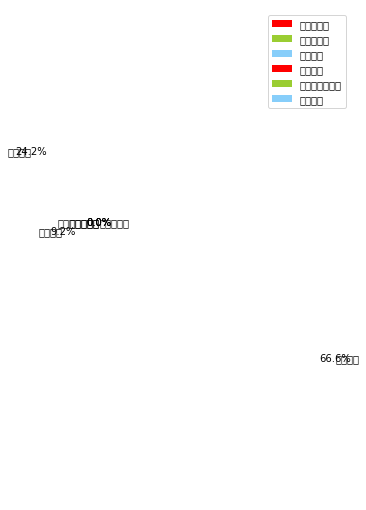

In [4]:

#调节图形大小，宽，高
plt.figure(figsize=(6,9))
#定义饼状图的标签，标签是列表
labels = ['含商品买赠','含商品折扣','含电子券','含预付卡','会员单商品折扣','整单优惠',]
#每个标签占多大，会自动去算百分比
sizes = [sum_all['包含商品买赠订单数量'],sum_all['包含商品折扣订单数量'],sum_all['包含电子券订单数量'],sum_all['预付卡支付订单数量'],sum_all['会员单商品折扣'],sum_all['整单优惠']]
colors = ['red','yellowgreen','lightskyblue']
#将某部分爆炸出来， 使用括号，将第一块分割出来，数值的大小是分割出来的与其他两块的间隙
#explode = (0.05,0,0)
explode = (sum_all['包含商品买赠订单数量'],sum_all['包含商品折扣订单数量'],sum_all['包含电子券订单数量'],sum_all['预付卡支付订单数量'],sum_all['会员单商品折扣'],sum_all['整单优惠'])

patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)

#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

#改变文本的大小
#方法是把每一个text遍历。调用set_size方法设置它的属性
for t in l_text:
    t.set_size=(30)
for t in p_text:
    t.set_size=(20)
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.legend()
plt.show()


In [5]:
#